# 누구나 파이썬 통계분석
## CHAPTER 03. 2차원 데이터 정리

In [1]:
import numpy as np
import pandas as pd

%precision 3
pd.set_option('precision', 3)

In [2]:
df = pd.read_csv('C:/Users/Boram Yun/TIL/Statistics/data/ch2_scores_em.csv', 
                 index_col='student number')

In [3]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english': en_scores,
                         'mathematics': ma_scores},
                        index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                       'F', 'G','H','I','J'],
                                      name='student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


### 3. 1 두 데이터 사이의 관계를 나타내는 지표: 공분산, 상관계수

##### 3.1.1 공분산 covariance  
- 분산에 가까운 지표  
  
'부호를 붙인 면적'이라는 관점에서  
- 편차들로 만든 도형이 음의 면적도 얻을 수 있음  
- 부호를 붙인 면적의 평균 (상관의 지표가 됨)

$$ S_{xy} = \frac{1}{n}{\sum\limits_{i=1}^{n}{(x_i-\bar{x})(y_i-\bar{y})}} $$

$$ Cov(X,Y) = \frac{\sum\limits_{i=1}^{N}{(X_i-\bar{X})(Y_i-\bar{Y})}}{N} $$

In [7]:
summary_df = scores_df.copy()
summary_df['english_deviation'] = summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] = summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] =\
    summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [8]:
summary_df['product of deviations'].mean()

62.8

- **공분산 행렬 covariance matrix** **분산공분산 행렬 variance-covariance matrix**  
  
Numpy : cov 함수 반환값 공분산 행렬  
Pandas : cov 메서드 있지만 ddof 인수 취하지 않고 불편분산만 계산 가능

In [9]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [10]:
cov_mat[0, 1], cov_mat[1, 0]  # 공분산

(62.800000000000004, 62.800000000000004)

In [11]:
cov_mat[0, 0], cov_mat[1, 1]  # 분산

(86.0, 68.44000000000001)

In [12]:
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.0, 68.44000000000001)

##### 3.1.2 상관계수 correlation coefficient  
- 단위에 의존하지 않는 상관을 나타내는 지표  

$$ r_{xy} = \frac{S_{xy}}{S_xS_y} \\ = \frac{1}{n}\sum\limits_{i=1}^{n}(\frac{x_i-\bar{x}}{S_{x}})(\frac{y_i-\bar{y}}{S_y}) $$  

- -1과 1 사이의 값을 취함
- 데이터가 양의 상관관계에 놓여 있을수록 1에 가까워지고,  
  음의 상관관계에 놓여 있을수록 -1에 가까워짐.
  무상관이면 0이 됨
- 상관계수가 -1, 1일 때에는 데이터가 완전히 직선상에 놓임

In [25]:
# /\ ?
np.cov(en_scores, ma_scores, ddof=0)[0, 1] /\
    (np.std(en_scores) * np.std(ma_scores))

0.8185692341186713

- **상관행렬 correlation matrix**  

In [26]:
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [27]:
scores_df.corr()

,english,mathematics
english,1.000,0.819
mathematics,0.819,1.000


### 3. 2 2차원 데이터의 시각화

- 산점도 scatter plot
- 히트맵 heat map : 히스토그램의 2차원 버전

In [28]:
import matplotlib.pyplot as plt

%matplotlib inline

##### 3.2.1 산점도 scatter plot  

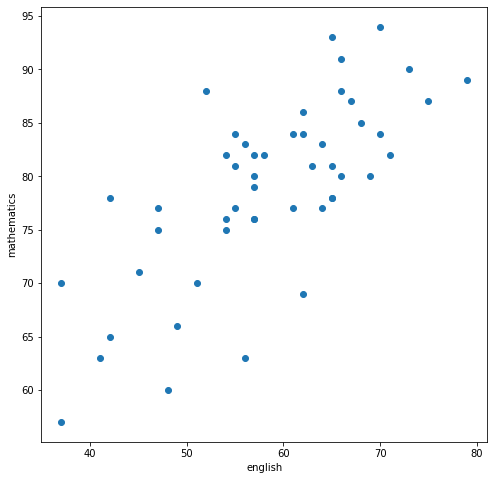

In [30]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

#산점도 (x축 데이터, y축 데이터)
ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

##### 3.2.2 회귀직선 regression line

In [36]:
poly_fit = np.polyfit(english_scores, math_scores, 1) # x, y, 차수
poly_fit

array([ 0.621, 42.601])

In [37]:
poly_1d = np.poly1d(poly_fit)
poly_1d

poly1d([ 0.621, 42.601])

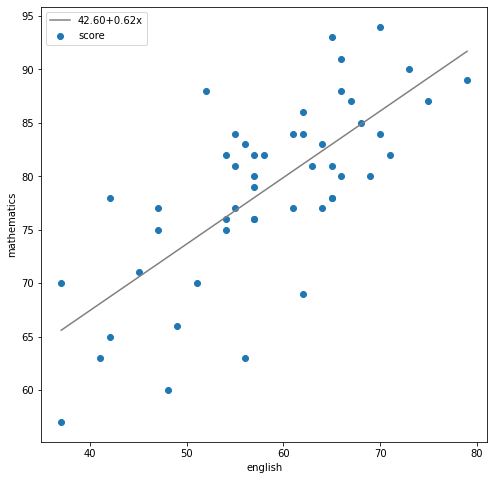

In [35]:
xs = np.linspace(english_scores.min(), english_scores.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(english_scores, math_scores, label='score')
ax.plot(xs, ys, color='gray',
       label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

ax.legend(loc='upper left')

plt.show()

##### 3.2.3 히트맵 heat map
히스토그램의 2차원 버전, 색을 이용해 표현 가능

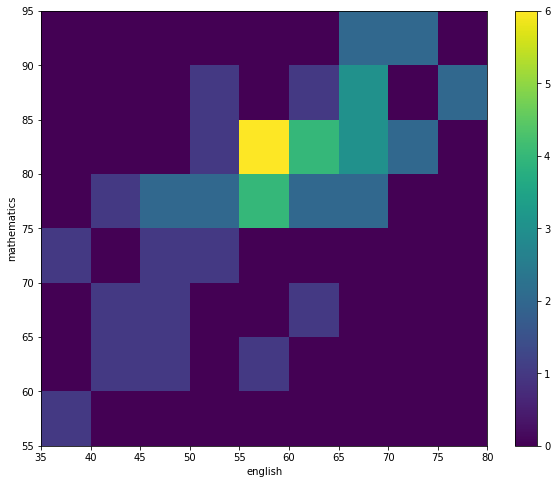

In [47]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores,
             bins=[9, 8], range=[(35, 80), (55, 95)])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])

# 컬러 바 표시
fig.colorbar(c[3], ax=ax)
plt.show()

### 3. 3 앤스컴의 예

In [50]:
anscombe_data = np.load('C:/Users/Boram Yun/TIL/Statistics/data/ch3_anscombe.npy')
print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [51]:
anscombe_data

array([[[10.  ,  8.04],
        [ 8.  ,  6.95],
        [13.  ,  7.58],
        [ 9.  ,  8.81],
        [11.  ,  8.33],
        [14.  ,  9.96],
        [ 6.  ,  7.24],
        [ 4.  ,  4.26],
        [12.  , 10.84],
        [ 7.  ,  4.82],
        [ 5.  ,  5.68]],

       [[10.  ,  9.14],
        [ 8.  ,  8.14],
        [13.  ,  8.74],
        [ 9.  ,  8.77],
        [11.  ,  9.26],
        [14.  ,  8.1 ],
        [ 6.  ,  6.13],
        [ 4.  ,  3.1 ],
        [12.  ,  9.13],
        [ 7.  ,  7.26],
        [ 5.  ,  4.74]],

       [[10.  ,  7.46],
        [ 8.  ,  6.77],
        [13.  , 12.74],
        [ 9.  ,  7.11],
        [11.  ,  7.81],
        [14.  ,  8.84],
        [ 6.  ,  6.08],
        [ 4.  ,  5.39],
        [12.  ,  8.15],
        [ 7.  ,  6.42],
        [ 5.  ,  5.73]],

       [[ 8.  ,  6.58],
        [ 8.  ,  5.76],
        [ 8.  ,  7.71],
        [ 8.  ,  8.84],
        [ 8.  ,  8.47],
        [ 8.  ,  7.04],
        [ 8.  ,  5.25],
        [19.  , 12.5 ],
        [ 

In [70]:
stats_df = pd.DataFrame(index=['X_mean', 'X_variance', 'Y_mean', 'Y_variance', 
                               'X&Y_correlation', 'X&Y_regression line'])
for i, data in enumerate(anscombe_data):
    dataX = data[:, 0]
    dataY = data[:, 1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i+1}'] =\
        [f'{np.mean(dataX):.2f}', 
         f'{np.var(dataX):.2f}', 
         f'{np.mean(dataY):.2f}', 
         f'{np.var(dataY):.2f}', 
         f'{np.corrcoef(dataX, dataY)[0, 1]:.2f}', 
         f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


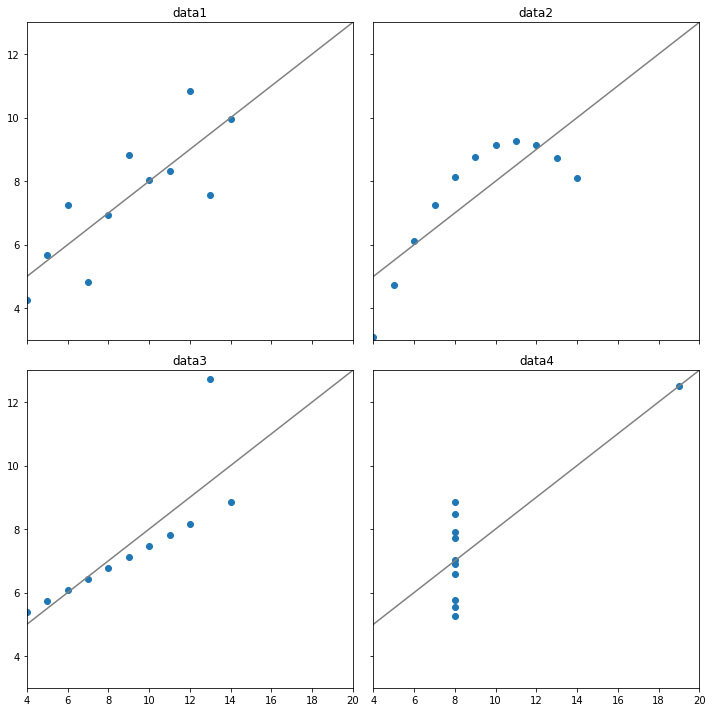

In [77]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                         sharex=True, sharey=True)

xs = np.linspace(0, 30, 100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:, 0], data[:, 1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    
    ax = axes[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:, 0], data[:, 1])
    ax.plot(xs, ys, color='gray')
    
plt.tight_layout() # 그래프 사이 간격 좁히기
plt.show()